In [4]:
from random import random, seed, randrange
from math import floor, pi
import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
import pandas as pd
from scipy.integrate import simps, trapz, cumtrapz

In [1]:
def fugacity( P, yco, co2_data, me_data, species):
    if( species == "co2"):
        return np.interp( P, co2_data.P, co2_data.F)*yco
    if( species == "me"):
        return np.interp( P, me_data.P, me_data.F)*(1-yco)

In [5]:
co2_data = pd.read_csv('c02.txt', sep = '\t')
co2_data['P'] = co2_data['Pressure (bar)']
co2_data['T'] = co2_data['Temperature (K)']
co2_data['V'] = co2_data['Volume (l/mol)']
co2_data['Z'] = co2_data.V * co2_data.P/(.08314)/(318.15)
exp = ( co2_data.Z - 1 )/co2_data.P
integral = cumtrapz( exp, co2_data.P)
thiele = np.exp( integral )
thiele = np.insert(thiele, 0,1)
co2_data['F'] = thiele*co2_data.P

In [6]:
me_data = pd.read_csv('ch4.txt', sep = '\t')
me_data['P'] = me_data['Pressure (bar)']
me_data['T'] = me_data['Temperature (K)']
me_data['V'] = me_data['Volume (l/mol)']
me_data['Z'] = me_data.V * me_data.P/(.08314)/(318.15)
exp = ( me_data.Z - 1 )/me_data.P
integral = cumtrapz( exp, me_data.P)
thiele = np.exp( integral )
thiele = np.insert(thiele, 0,1)
me_data['F'] = thiele*me_data.P


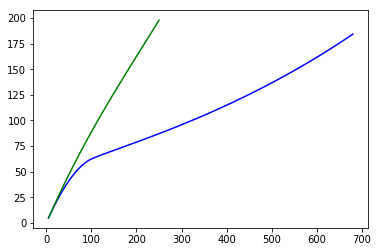

In [8]:
plt.plot( "P", "F", data = co2_data, color = "blue" )
plt.plot( "P", "F", data = me_data, color = "green" )